# Formula Data Analysis

You are a data analyst working for the Fédération Internationale de l'Automobile (FIA), the company that oversees Formula 1 and oher motorsports.
The FIA believes that their viewership increase is something to strive for, and it is also known that faster cars, and closer race finishes increases viewership.

From the provided datasets, derive insights that can help to see if the regulation changes implemented in recent years has helped achieve this goal.

### Guiding questions

##### - What is the problem you are trying to solve?

The main objective is to determine how close the racing was after the regulation change.


##### - How can your insights drive business decisions?

The insights will help the regulation team to make technical and aerodynamical regulatory changes.


##### - Where is your data from?

The data is from a first-party source in a Formula 1 API.


##### - Are there issues with bias or credibility in this data? Does your data ROCCC?

Bias isn't a problem, the population of the dataset is it's own race data. And have full credibility for the same reason. And finally, it's ROCCC because it's reliable, original, comprehensive, current and cited.


##### - How are you addressing licensing, privacy, security, and accessibility?

The company has their own licence over the dataset. Besides that, the dataset doesn't have any legality issues.


##### - How did you verify the data’s integrity?

All the files have consistent columns and each column has the correct type of data.


##### - How does it help you answer your question?

It may have some key insights about the cars and the drivers' driving style.

### Deliverable
##### A clear statement of the business task

Find the keys differences between 2018 and 2022 laptime for the same circuit, and how changes has influenced them.

### Prepare

In [298]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain
import matplotlib
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.animation as ani
import seaborn as sns
plt.style.use('ggplot')

import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [296]:
#creating a cache folder is highly recommended for this task
ff1.Cache.enable_cache('~/cache')

### Reading Dataset
The Python code below reads the dataset into a Pandas data frame.
For this code to work, the *fastf1* API must be used.

In [241]:
monaco_qualification_2018 = ff1.get_session(2018, 'Monaco', 'Q')
monaco_qualification_2022 = ff1.get_session(2022, 'Monaco', 'Q')
monaco_qualification_2018.load()
monaco_qualification_2022.load()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 33
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['3', '5', '44', '7', '77', '31', '14', '55', '11', '10', '27', '2', '35', '16', '8', '28', '9', '18', '20', '33']
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.0]
api            INFO 	No cached data found for driver_

### Visualization

#### Visualizing the laptime for P1 and P2 at the Monaco Grand Prix 2018

C:\Users\adtvr\anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 33
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: [

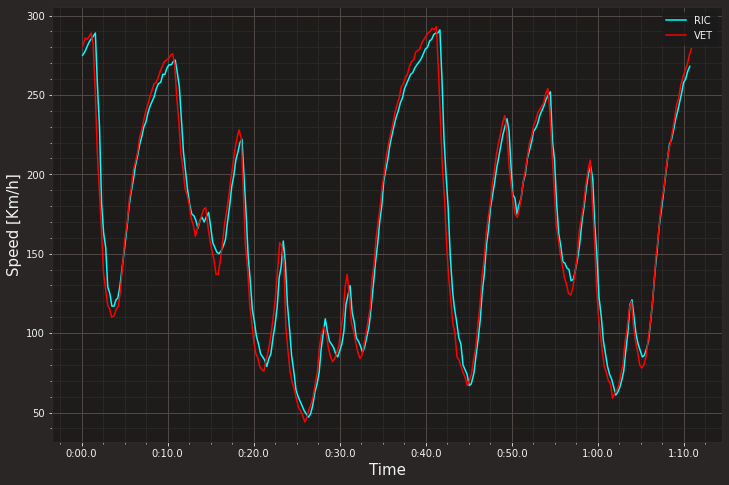

In [299]:
laps = monaco_qualification_2018.load_laps(with_telemetry=True)
ric_fastest_lap = laps.pick_driver('RIC').pick_fastest()
vet_fastest_lap = laps.pick_driver('VET').pick_fastest()
ric_car_data = ric_fastest_lap.get_car_data()
vet_car_data = vet_fastest_lap.get_car_data()
t_ric = ric_car_data['Time']
t_vet = vet_car_data['Time']
velocity_ric = ric_car_data['Speed']
velocity_vet = vet_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(t_ric, velocity_ric, label='RIC', color='cyan')
ax.plot(t_vet, velocity_vet, label='VET', color='red')

ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)


ax.legend()



We can see that the VET was beaten by RIC by a very small margin.

#### Comparing the density of Laptimes in 2018 :

C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Laps')

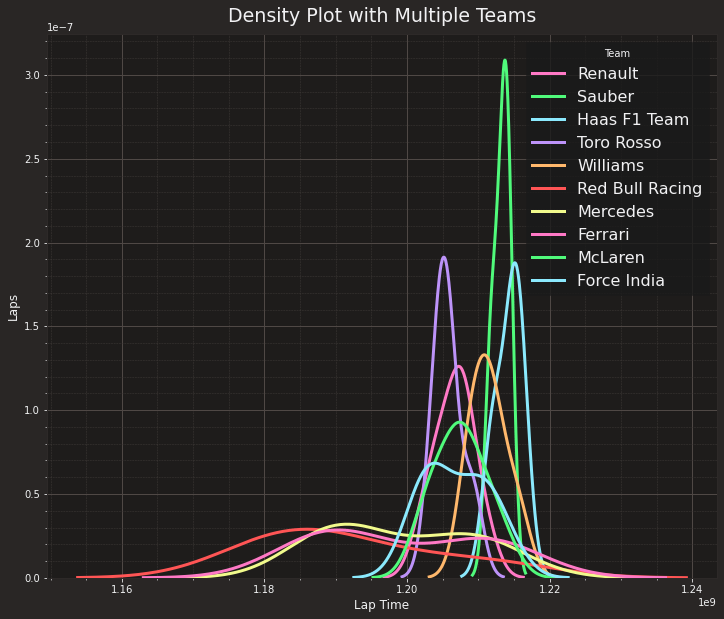

In [318]:
#Defining the team
teams_2018 = ["Renault","Sauber", "Haas F1 Team","Toro Rosso","Williams","Red Bull Racing", "Mercedes", "Ferrari", "McLaren","Force India"]
''''''
#Picking top laptimes from each team
best_laptimes = monaco_qualification_2018.laps.pick_teams(teams_2018).pick_quicklaps(1.03)

plt.subplots(figsize=(12,10))

for team in teams_2018:
    # Subset to the team
    subset = best_laptimes[best_laptimes['Team'] == team]
    
    # Draw the density plot
    sns.distplot(subset['LapTime']/60, hist = False, kde = True,kde_kws = {'linewidth': 3},label = team)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Team')
plt.title('Density Plot with Multiple Teams')
plt.xlabel('Lap Time')
plt.ylabel('Laps')

We can see that a few teams are much faster than their competitors. Thus asking the poorly performing teams to spend more time on track, trying to improve their laptimes.



C:\Users\adtvr\anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '

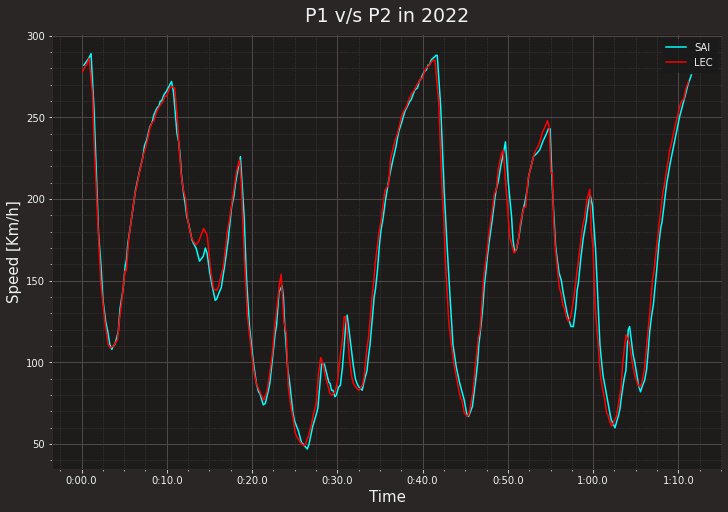

In [312]:
laps = monaco_qualification_2022.load_laps(with_telemetry=True)
lec_fastest_lap = laps.pick_driver('LEC').pick_fastest()
sai_fastest_lap = laps.pick_driver('SAI').pick_fastest()
lec_car_data = lec_fastest_lap.get_car_data()
sai_car_data = sai_fastest_lap.get_car_data()
t_lec = lec_car_data['Time']
t_sai = sai_car_data['Time']
velocity_lec = lec_car_data['Speed']
velocity_sai = sai_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(t_sai, velocity_sai, label='SAI', color='cyan')
ax.plot(t_lec, velocity_lec, label='LEC', color='red')

plt.title('P1 v/s P2 in 2022')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)


ax.legend()

### Pole Lap Monaco Grand Prix 2018 vs 2022

C:\Users\adtvr\anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
core        WARNING 	No lap data for driver 33
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: [

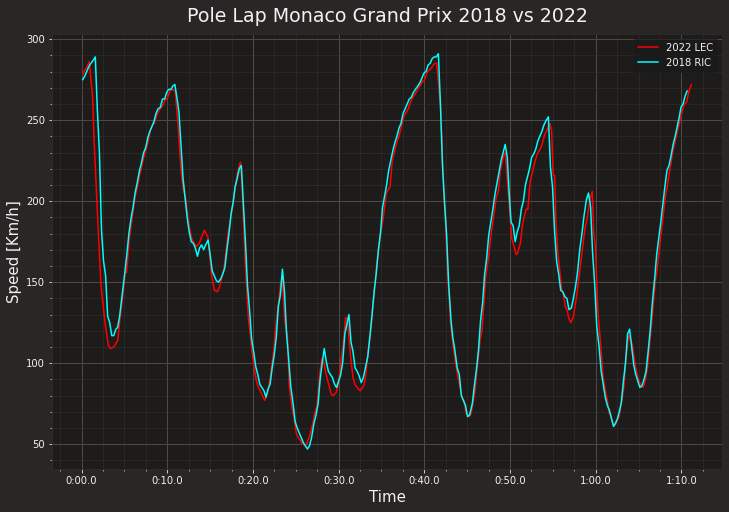

In [313]:
laps_2018 = monaco_qualification_2018.load_laps(with_telemetry=True)
laps_2022 = monaco_qualification_2022.load_laps(with_telemetry=True)
ric_fastest_lap = laps_2018.pick_driver('RIC').pick_fastest()
lec_fastest_lap = laps_2022.pick_driver('LEC').pick_fastest()
ric_car_data = ric_fastest_lap.get_car_data()
lec_car_data = lec_fastest_lap.get_car_data()
t_ric = ric_car_data['Time']
t_lec = lec_car_data['Time']
velocity_ric = ric_car_data['Speed']
velocity_lec = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(t_lec, velocity_lec, label='2022 LEC', color='red')
ax.plot(t_ric, velocity_ric, label='2018 RIC', color='cyan')

plt.title('Pole Lap Monaco Grand Prix 2018 vs 2022')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)


ax.legend()



Here we can see that, though it is marginal, the speed of the car in 2022 is noticable slower than the speed of the car in 2018.

### Density plot with multiple teams
#### Monaco Grand Prix 2022

C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Text(0, 0.5, 'Laps')

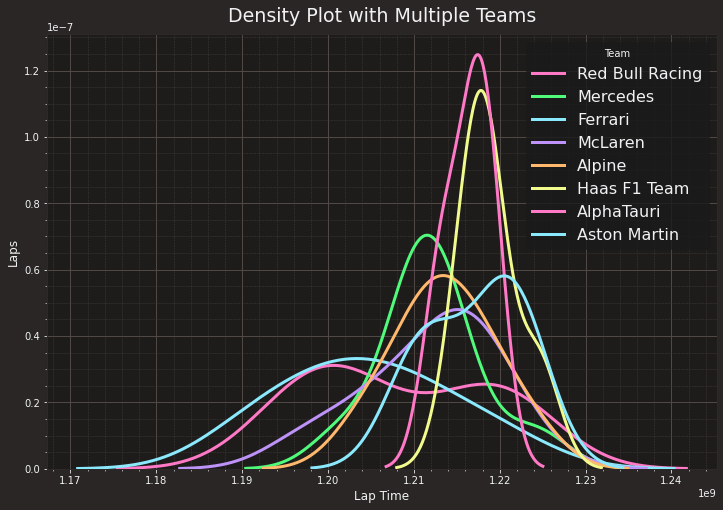

In [316]:
#Defining the team
teams_2022 = ["Red Bull Racing", "Mercedes", "Ferrari", "McLaren","Alpine","Alfa Romea", "Haas F1 Team","AlphaTauri","Williams","Aston Martin"]

#Picking top laptimes from each team
best_laptimes = monaco_qualification_2022.laps.pick_teams(teams_2022).pick_quicklaps(1.03)

plt.subplots(figsize=(12,8))

for team in teams_2022:
    # Subset to the team
    subset = best_laptimes[best_laptimes['Team'] == team]
    
    # Draw the density plot
    sns.distplot(subset['LapTime']/60, hist = False, kde = True,kde_kws = {'linewidth': 3},label = team)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Team')
plt.title('Density Plot with Multiple Teams')
plt.xlabel('Lap Time')
plt.ylabel('Laps')

Here we can see that though there are two teams (Ferrari and Red Bull) which are noticably faster than other teams.

However, the teams still have their laptimes much closer than in 2018.

C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\adtvr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of teams')

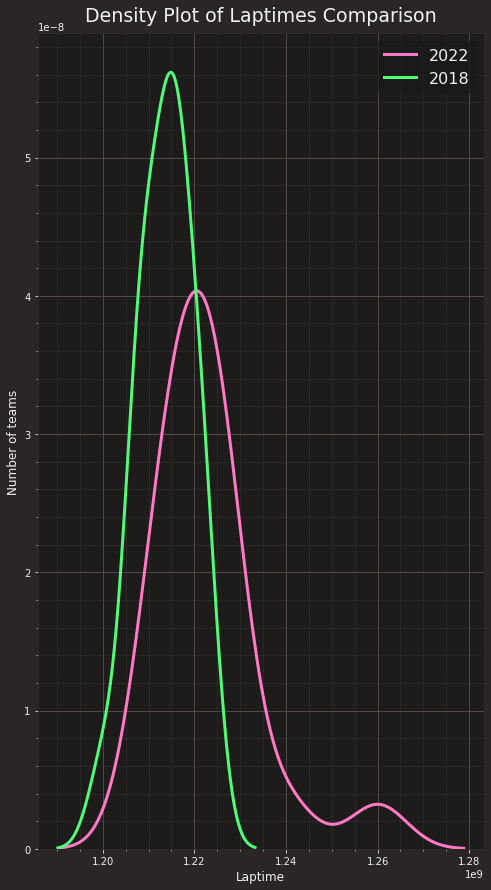

In [294]:
#Defining the teams
teams_2022 = ["Red Bull Racing", "Mercedes", "Ferrari", "McLaren","Alpine","Alfa Romea", "Haas F1 Team","AlphaTauri","Williams","Aston Martin"]
teams_2018 = ["Red Bull Racing", "Mercedes", "Ferrari", "McLaren","Renault","Sauber", "Haas F1 Team","Toro Rosso","Williams","Force India"]

#Picking top laptimes from each team
best_laptimes_2022 = monaco_qualification_2022.results[:20]
best_laptimes_2018 = monaco_qualification_2018.results[:19]


plt.subplots(figsize=(8,15))

sns.distplot(best_laptimes_2022['Q1']/60, hist = False, kde = True,kde_kws = {'linewidth': 3}, label = 2022)
sns.distplot(best_laptimes_2018['Q1']/60, hist = False, kde = True,kde_kws = {'linewidth': 3}, label = 2018)

# Plot formatting
plt.legend(prop={'size': 16})
plt.title('Density Plot of Laptimes Comparison')
plt.xlabel('Laptime')
plt.ylabel('Number of teams')

Here we can see that the 2018 plot is not as flat as the 2022 graph, thus we can say that the cars have gotten closer in terms of laptime.

### Observations :

- We can see that the cars are slower in 2022 than in 2018, and for a sport that is defined by speed, we can say that the regulations have had a negative effect on the speed of the car.

- Though the cars are slower in 2022, we can see that the cars are better able to closely match the speed and laptimes of rival cars.